<a href="https://colab.research.google.com/github/mistryamit03/Machine-Learning-Projects/blob/main/Price_Optimization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/retail_price.csv')
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


# Create a duplicate (shallow or deep) of the original DataFrame df and store it as df_copy.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [4]:
df.drop(['s'], axis=1)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [5]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


# Dates in the data frames are inconsistent(dd-mm-yyyy) format so we make it as (yyyy-mm-dd)



In [6]:
df['month_year'] = pd.to_datetime(df['month_year'])
df['year'] = df['month_year'].dt.year
df['month'] = df['month_year'].dt.month
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,2017-01-07,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,2017-01-08,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,2017-01-09,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_id                  676 non-null    object        
 1   product_category_name       676 non-null    object        
 2   month_year                  676 non-null    datetime64[ns]
 3   qty                         676 non-null    int64         
 4   total_price                 676 non-null    float64       
 5   freight_price               676 non-null    float64       
 6   unit_price                  676 non-null    float64       
 7   product_name_lenght         676 non-null    int64         
 8   product_description_lenght  676 non-null    int64         
 9   product_photos_qty          676 non-null    int64         
 10  product_weight_g            676 non-null    int64         
 11  product_score               676 non-null    float64       

In [8]:
df['product_category_name'].value_counts()

,count
product_category_name,
garden_tools,160
health_beauty,130
watches_gifts,103
computers_accessories,69
bed_bath_table,61
cool_stuff,57
furniture_decor,48
perfumery,26
consoles_games,22


In [9]:
df.nunique()

,0
product_id,52
product_category_name,9
month_year,20
qty,66
total_price,573
freight_price,653
unit_price,280
product_name_lenght,24
product_description_lenght,46
product_photos_qty,7


# Exploratory Analysis

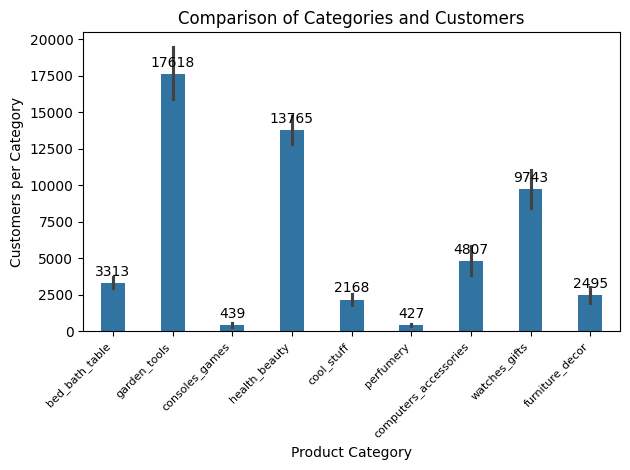

In [10]:
# Create the bar plot
ax = sns.barplot(x='product_category_name', y='customers', data=df, estimator=sum, width=0.4)

# Add total counts at the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Add titles and labels
plt.title('Comparison of Categories and Customers')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel('Customers per Category')

# Show plot
plt.tight_layout()
plt.show()

In [11]:
list(df.columns)

['product_id',
 'product_category_name',
 'month_year',
 'qty',
 'total_price',
 'freight_price',
 'unit_price',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_score',
 'customers',
 'weekday',
 'weekend',
 'holiday',
 'month',
 'year',
 's',
 'volume',
 'comp_1',
 'ps1',
 'fp1',
 'comp_2',
 'ps2',
 'fp2',
 'comp_3',
 'ps3',
 'fp3',
 'lag_price']

# Feature Engineering

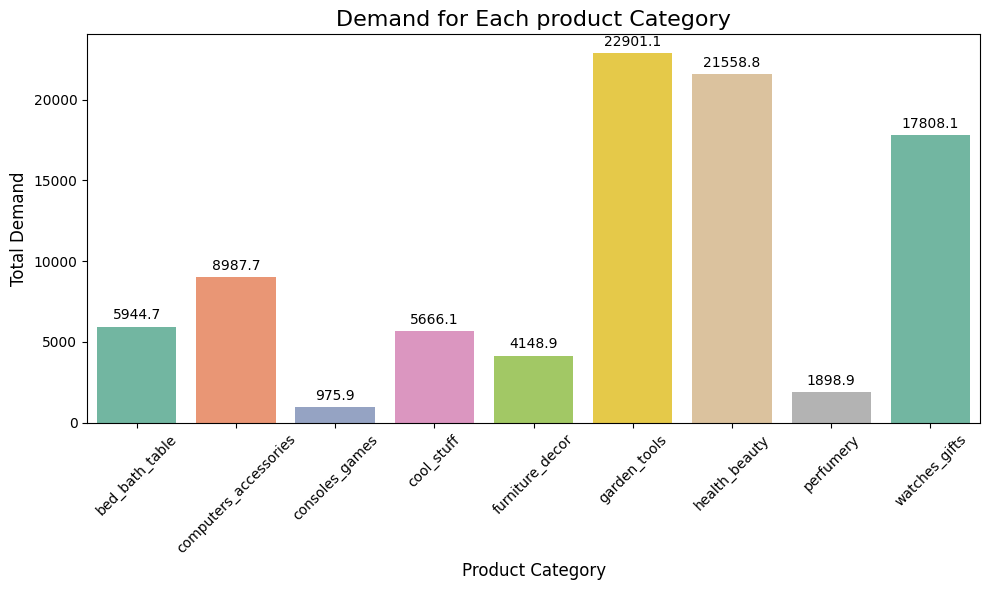

In [12]:
# Define the linear demand function to work on a row of a DataFrame

def linear_demand_function(row, alpha = 10, beta1=0.5, beta2=0.8, beta3=1.2):

  # A linear demand function that calculates demand based on unit price, number of customer, and product score.


    unit_price = row['unit_price']
    customers = row['customers']
    product_score = row['product_score']

    # Calculate demand

    demand = alpha + beta1 * unit_price + beta2 * customers + beta3 * product_score
    return max(demand,0)



# Apply the linear demand function to each row in the Data Frame

df['demand'] = df.apply(linear_demand_function, axis=1)


  # Group demand by product_category_name to visualize it


demand_by_category = df.groupby('product_category_name')['demand'].sum().reset_index()


  # Plot the demand for each product category

plt.figure(figsize=(10,6))
ax = sns.barplot(x='product_category_name', y='demand', data= demand_by_category, palette='Set2')


# Add total counts (demand) at the end of each bar

for container in ax.containers:
  ax.bar_label(container, fmt='%.1f', label_type = 'edge', padding=3)


# Add titles and labels

plt.title('Demand for Each product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Demand', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()


# Show plot
plt.show()


#Profit margin of our product with respect to competitors

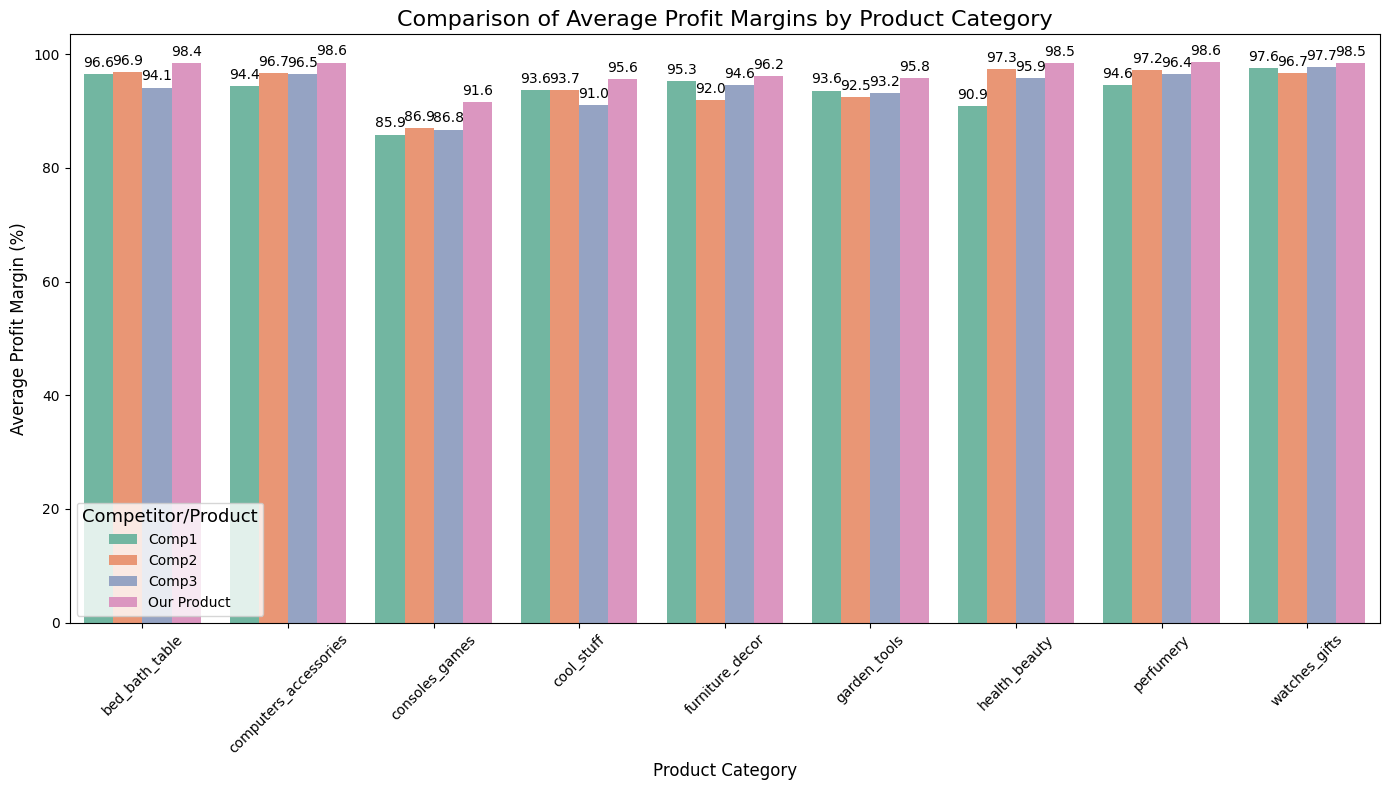

In [13]:
# Calculate revenue, profit and margin for each competitor and your product



df["revenue_comp1"] = df['qty'] * df["comp_1"]
df["profit_comp1"] = df['revenue_comp1'] - df['fp1']
df["margin_comp1"] = (df['profit_comp1'] / df['revenue_comp1']) * 100




df["revenue_comp2"] = df['qty'] * df["comp_2"]
df["profit_comp2"] = df['revenue_comp2'] - df['fp2']
df["margin_comp2"] = (df['profit_comp2'] / df['revenue_comp2']) * 100


df["revenue_comp3"] = df['qty'] * df["comp_3"]
df["profit_comp3"] = df['revenue_comp3'] - df['fp3']
df["margin_comp3"] = (df['profit_comp3'] / df['revenue_comp3']) * 100



df["revenue_our_product"] = df['qty'] * df["total_price"]
df["profit_our_product"] = df['revenue_our_product'] - df['freight_price']
df["margin_our_product"] = (df['profit_our_product'] / df['revenue_our_product']) * 100



# Group by 'product_category_name' to calculate the average margin for each competitor and your product
avg_margin_df = df.groupby('product_category_name').agg({
    'margin_comp1': 'mean',
    'margin_comp2': 'mean',
    'margin_comp3': 'mean',
    'margin_our_product': 'mean'
}).reset_index()


# Melt the data to bring it into long format for easier plotting


# Melt the data to bring it into long format for easier plotting
avg_margin_melted = pd.melt(avg_margin_df, id_vars='product_category_name',
                            value_vars=['margin_comp1', 'margin_comp2', 'margin_comp3', 'margin_our_product'],
                            var_name='Competitor', value_name='Average Profit Margin')



# Rename for better visualization
avg_margin_melted['Competitor'] = avg_margin_melted['Competitor'].replace({
    'margin_comp1': 'Comp1',
    'margin_comp2': 'Comp2',
    'margin_comp3': 'Comp3',
    'margin_our_product': 'Our Product'
})

# Plot the grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='product_category_name', y='Average Profit Margin', hue='Competitor', data=avg_margin_melted, palette='Set2')

# Add annotations at the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3, fontsize=10)

# Add titles and labels
plt.title('Comparison of Average Profit Margins by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Profit Margin (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Competitor/Product', title_fontsize='13', fontsize='10')
plt.tight_layout()
plt.show()

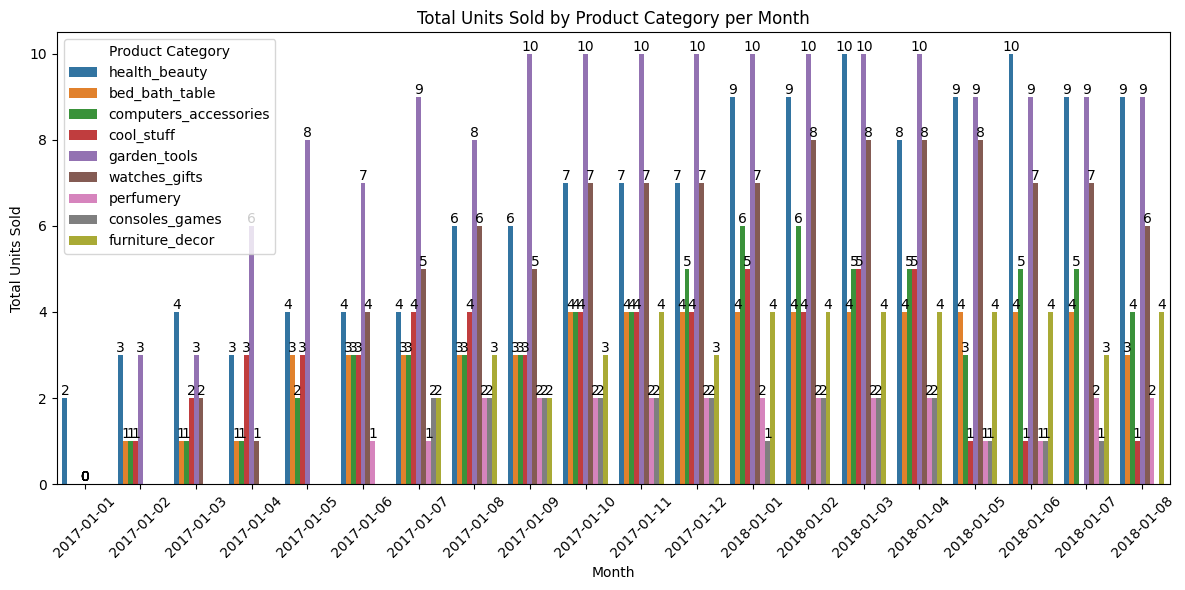

In [14]:
# Count the occurrences of each month and product category
grouped_data = df.groupby(['month_year', 'product_category_name']).size().reset_index(name='units_sold')

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=grouped_data, x='month_year', y='units_sold', hue='product_category_name')

# Annotate the bars with total units sold
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Total Units Sold by Product Category per Month')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.legend(title='Product Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
# plt.show()

# Distribution of Freight Price Differences

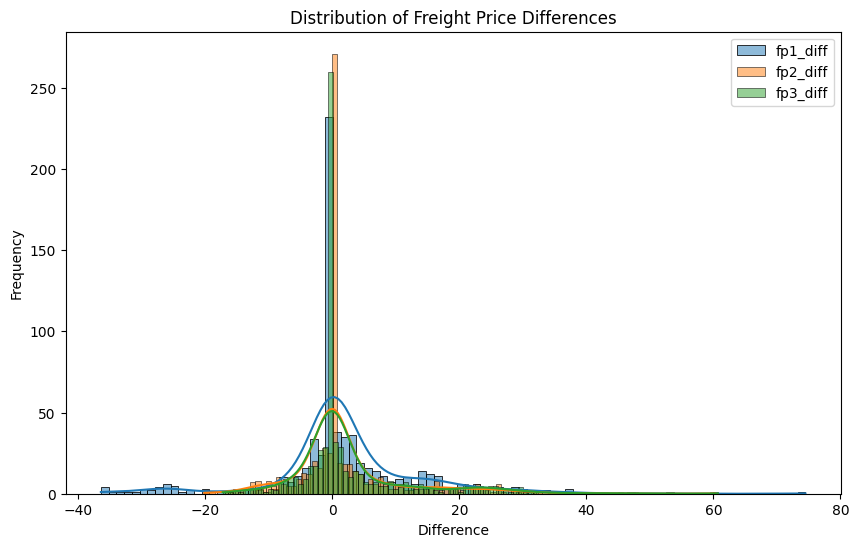

In [15]:
# Distribution of Freight Price Differences

df["fp1_diff"] = df["freight_price"] - df["fp1"]
df["fp2_diff"] = df["freight_price"] - df["fp2"]
df["fp3_diff"] = df["freight_price"] - df["fp3"]
plt.figure(figsize=(10, 6))
sns.histplot(df["fp1_diff"], label="fp1_diff", kde=True)
sns.histplot(df["fp2_diff"], label="fp2_diff", kde=True)
sns.histplot(df["fp3_diff"], label="fp3_diff", kde=True)
plt.title("Distribution of Freight Price Differences")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Comparison of Price Ratios by Product Category

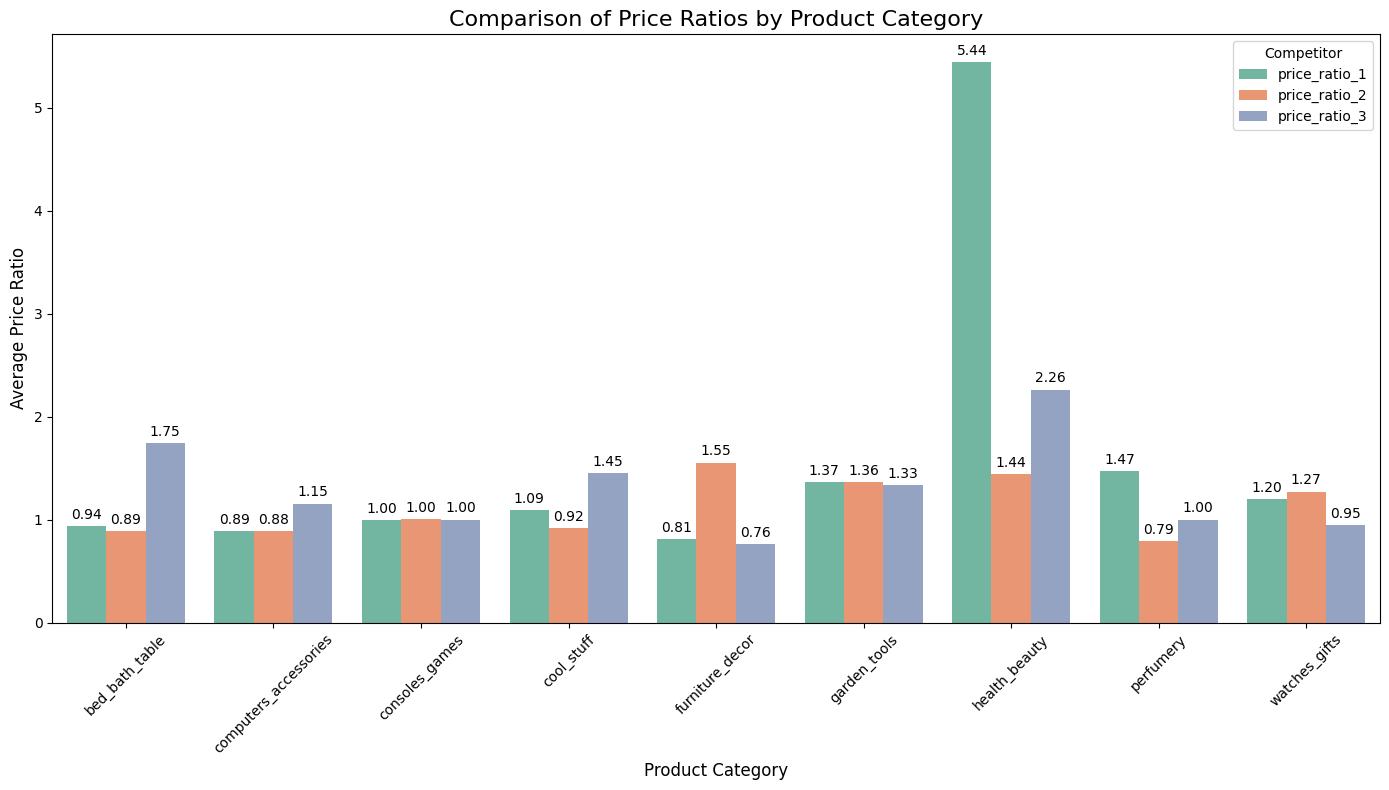

In [16]:
# Calculate price ratios
df["price_ratio_1"] = df["unit_price"] / df["comp_1"]
df["price_ratio_2"] = df["unit_price"] / df["comp_2"]
df["price_ratio_3"] = df["unit_price"] / df["comp_3"]

# Group by 'product_category_name' and 'month_year', then calculate mean price ratios
price_ratios = df.groupby(['product_category_name', 'month_year']).agg({
    'price_ratio_1': 'mean',
    'price_ratio_2': 'mean',
    'price_ratio_3': 'mean'
}).reset_index()

# Reshape data using melt for easy plotting
price_ratios_melted = pd.melt(price_ratios, id_vars=['product_category_name', 'month_year'],
                              var_name='Competitor', value_name='Price Ratio')

# Plot the grouped bar chart comparing price ratios by product category
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='product_category_name', y='Price Ratio', hue='Competitor', data=price_ratios_melted, ci=None, palette='Set2')

# Add total counts (price ratio) at the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Add titles and labels
plt.title('Comparison of Price Ratios by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price Ratio', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Competitor', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

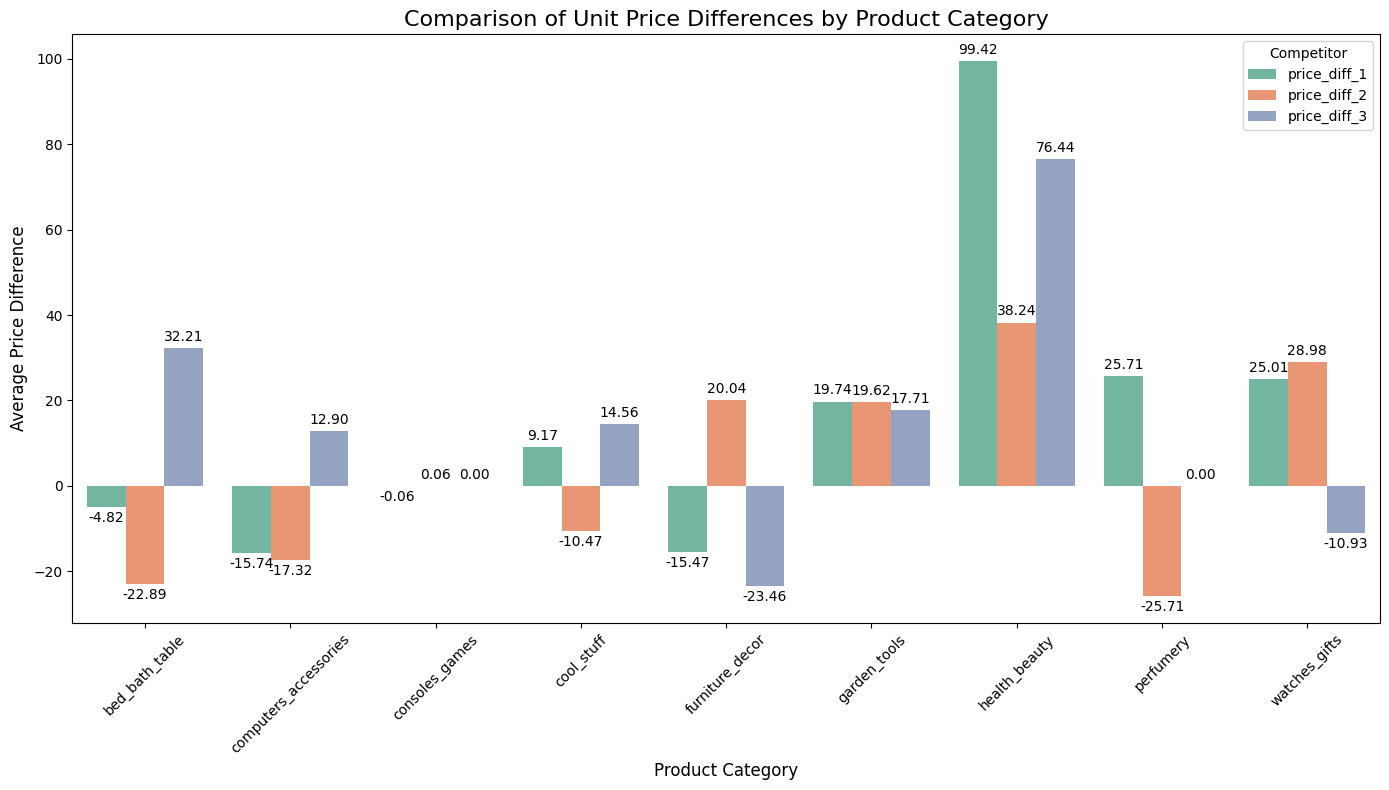

In [17]:
# Calculate price differences
df["price_diff_1"] = df["unit_price"] - df["comp_1"]
df["price_diff_2"] = df["unit_price"] - df["comp_2"]
df["price_diff_3"] = df["unit_price"] - df["comp_3"]

# Group by 'product_category_name' and 'month_year' to calculate the mean price differences
price_diffs = df.groupby(['product_category_name', 'month_year']).agg({
    'price_diff_1': 'mean',
    'price_diff_2': 'mean',
    'price_diff_3': 'mean'
}).reset_index()

# Reshape the data using melt for easy plotting
price_diffs_melted = pd.melt(price_diffs, id_vars=['product_category_name', 'month_year'],
                             var_name='Competitor', value_name='Price Difference')

# Plot the grouped bar chart comparing price differences by product category
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='product_category_name', y='Price Difference', hue='Competitor', data=price_diffs_melted, ci=None, palette='Set2')

# Add total counts (price differences) at the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Add titles and labels
plt.title('Comparison of Unit Price Differences by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price Difference', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Competitor', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

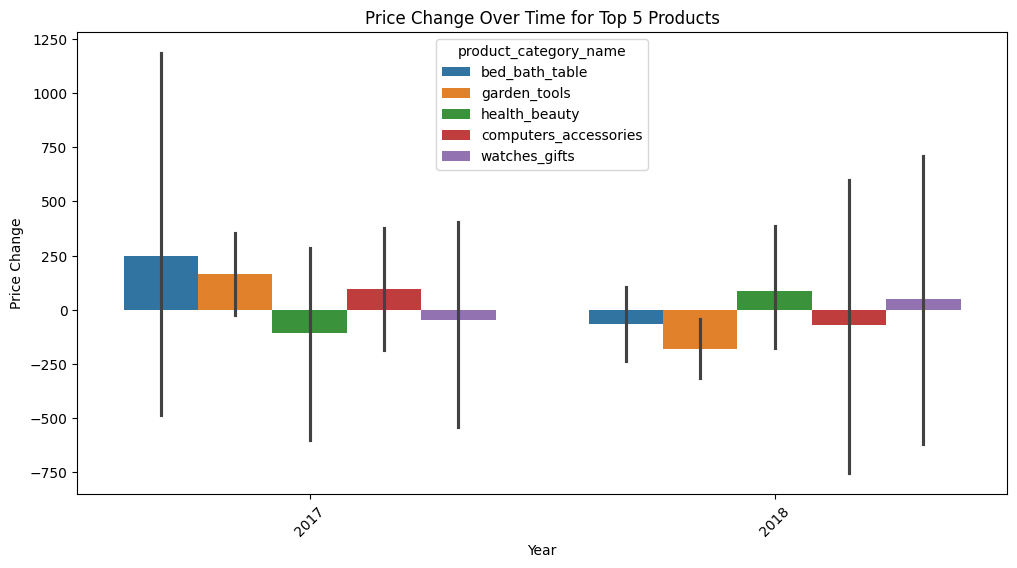

In [18]:
df["lag_price"] = df.groupby("product_category_name")["total_price"].shift(1)
df['price_change'] = df['total_price'] - df['lag_price']
top_products = df['product_category_name'].value_counts().nlargest(5).index
filtered_df = df[df['product_category_name'].isin(top_products)]

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='price_change', hue='product_category_name', data=filtered_df)
plt.title('Price Change Over Time for Top 5 Products')
plt.xlabel('Year')
plt.ylabel('Price Change')
plt.xticks(rotation=45)
plt.show()


In [19]:
list(df.columns)

['product_id',
 'product_category_name',
 'month_year',
 'qty',
 'total_price',
 'freight_price',
 'unit_price',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_score',
 'customers',
 'weekday',
 'weekend',
 'holiday',
 'month',
 'year',
 's',
 'volume',
 'comp_1',
 'ps1',
 'fp1',
 'comp_2',
 'ps2',
 'fp2',
 'comp_3',
 'ps3',
 'fp3',
 'lag_price',
 'demand',
 'revenue_comp1',
 'profit_comp1',
 'margin_comp1',
 'revenue_comp2',
 'profit_comp2',
 'margin_comp2',
 'revenue_comp3',
 'profit_comp3',
 'margin_comp3',
 'revenue_our_product',
 'profit_our_product',
 'margin_our_product',
 'fp1_diff',
 'fp2_diff',
 'fp3_diff',
 'price_ratio_1',
 'price_ratio_2',
 'price_ratio_3',
 'price_diff_1',
 'price_diff_2',
 'price_diff_3',
 'price_change']

In [20]:
df.to_csv('updated_data.csv', index=False)


In [21]:
# Exclude 'product_category_name' from correlation calculation
import plotly.express as px


corrs = df.drop(columns=['product_category_name']).select_dtypes(include=np.number).corr()['unit_price'].sort_values(ascending=False)

# Plot the correlation excluding 'product_category_name'
fig = px.bar(x=corrs.keys(), y=corrs.values,
             title='Correlation of Features with Unit Price (Excluding Product Category)',
             labels={
                 'x': 'Features',
                 'y': 'Correlation'
             })
fig.show()

# Demand Forecasting

In [22]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Ensure the dataframe is sorted by month_year for time-series analysis
df = df.sort_values('month_year')

# Convert month_year to datetime for time series purposes
df['month_year'] = pd.to_datetime(df['month_year'])

# Handle any missing values
df = df.fillna(method='ffill').fillna(method='bfill')  # Example fill; adjust as needed

In [24]:
# Stationarity Test
result = adfuller(df['demand'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing if needed
if result[1] > 0.05:
    df['demand_diff'] = df['demand'].diff().dropna()
else:
    df['demand_diff'] = df['demand']

ADF Statistic: -5.893490226359807
p-value: 2.8875188620895657e-07
